# All the results and visualizations for the Sampta Paper

In [1]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [2]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 3095


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
1745,RF-NAMA,parkinsons,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.9128205128205128, '1738': 0.917948717...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.907051282051282, '1738': 0.9615384615...","{'42': 0.20512820512820512, '1738': 0.53846153...","{'42': 0.20512820512820512, '1738': 0.48717948...","{'42': 0.1794871794871795, '1738': 0.256410256...","{'42': 0.1794871794871795, '1738': 0.256410256...","{'42': 0.054626532887402456, '1738': 0.1380074...","{'42': 0.054626532887402456, '1738': 0.1380074...","{'42': 0.14386233921117642, '1738': 0.55494505...","{'42': 0.14386233921117642, '1738': 0.50549450...","{'42': {'RF-OOB': 0.9391025641025641, 'KNN_A':...",{}
959,MASH-,glass,turn,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.8177570093457944, '1738': 0.817757009...","{'42': 0.002816839898681107, '1738': 0.0028168...","{'42': 0.8011695906432749, '1738': 0.824561403...","{'42': 0.7906976744186046, '1738': 0.674418604...","{'42': 0.7441860465116279, '1738': 0.651162790...","{'42': 0.6744186046511628, '1738': 0.651162790...","{'42': 0.6744186046511628, '1738': 0.651162790...","{'42': 0.6424264796357819, '1738': 0.637893296...","{'42': 0.6424264796357819, '1738': 0.631053351...","{'42': 0.7906563448791112, '1738': 0.661770705...","{'42': 0.7490128689807921, '1738': 0.639914880...","{'42': {'RF-OOB': 0.8391812865497076, 'KNN_A':...","{'knn': 0.04058609387865806, 'page_rank': 0.00..."
586,RF-SPUD,ionosphere,turn,0.3,"{'knn': 10, 'OD_method': 'default', 'agg_metho...","{'42': 0.9772079772079773, '1738': 0.977207977...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.9767857142857143, '1738': 0.971428571...","{'42': 0.49295774647887325, '1738': 0.42253521...","{'42': 0.4084507042253521, '1738': 0.507042253...","{'42': 0.4225352112676056, '1738': 0.394366197...","{'42': 0.4225352112676056, '1738': 0.450704225...","{'42': 0.2815094461384573, '1738': 0.294989355...","{'42': 0.3014810024762235, '1738': 0.388802162...","{'42': 0.44558045950119324, '1738': 0.35745868...","{'42': 0.34073125622421396, '1738': 0.47212316...","{'42': {'RF-OOB': 0.9553571428571429, 'KNN_A':...",{}
2489,RF-SPUD,iris,skewed,0.3,"{'knn': 34, 'OD_method': 'default', 'agg_metho...",{'42': 0.92},{'42': 0.0},{'42': 0.8541666666666666},{'42': 0.5},{'42': 0.7},{'42': 0.5},{'42': 0.7},{'42': 0.5045498084291188},{'42': 0.6918518518518518},{'42': 0.5023774437567542},{'42': 0.6883384932920537},"{'42': {'RF-OOB': 0.85, 'KNN_A': 0.83333333333...",{}
1749,RF-SPUD,ionosphere,even,0.3,"{'knn': 50, 'OD_method': 'mean', 'agg_method':...",{'42': 0.9572649572649573},{'42': 0.037037037037037035},{'42': 0.9696428571428571},{'42': 0.39436619718309857},{'42': 0.4084507042253521},{'42': 0.39436619718309857},{'42': 0.39436619718309857},{'42': 0.22307582870963152},{'42': 0.22307582870963152},{'42': 0.22307582870963152},{'42': 0.27449479485609307},"{'42': {'RF-OOB': 0.9553571428571429, 'KNN_A':...",{}


In [3]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')
cls_bl.sample(5)

,csv_file,split,A_Classification_Score,B_Classification_Score
97,breast_cancer,turn,0.964286,0.964286
544,crx,distort,0.834586,0.827068
176,seeds,even,0.900000,0.800000
11,iris,even,0.966667,1.000000
273,water_potability,skewed,0.000000,0.000000


In [4]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')
reg_bl.sample(5)


,csv_file,split,A_Classification_Score,B_Classification_Score
129,Automobile,distort,0.672568,0.655417
295,AirfoilSelfNoise,random,-0.011692,0.833647
47,Parkinsons,turn,0.772005,0.772005
109,ConcreteSlumpTest,distort,0.461100,0.390801
336,Automobile,even,0.697154,0.813333


In [5]:
#This helps me to see where my tests have failed
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                                                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", "Random Forest (F1 score or RMSE) B"]:
    proc_df[columns] = [np.mean(list(d.values())) for d in proc_df[columns].values]

proc_df["Combined_Metric"] = proc_df["CE"] - proc_df["FOSCTTM"]

In [ ]:
proc_df

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Combined_Metric
0,MAGAN,tic-tac-toe,random,0.3,0.527557,0.026382,0.722454,0.685417,0.763542,0.740625,0.651042,0.720547,0.604772,0.616726,0.756341,"{'42': {'RF-OOB': 0.7486945169712794, 'KNN_A':...",0.501175
1,MASH-,seeds,turn,0.3,0.959799,0.001616,0.981132,0.890000,0.885000,0.905000,0.905000,0.907291,0.907291,0.891926,0.887240,"{'42': {'RF-OOB': 0.9905660377358491, 'KNN_A':...",0.958183
2,SSMA,segmentation,turn,0.3,0.751825,0.008072,0.771233,0.338182,0.338182,0.461818,0.461818,0.434693,0.434693,0.333559,0.333250,"{'42': {'RF-OOB': 0.9761904761904762, 'KNN_A':...",0.743753
3,MALI-RF,flare1,skewed,0.3,0.888545,0.328854,0.883721,0.876923,0.876923,0.876923,0.876923,0.819420,0.819420,0.842393,0.819420,"{'42': {'RF-OOB': 0.8875968992248062, 'KNN_A':...",0.559691
4,SPUD,EnergyEfficiency,skewed,0.3,0.009842,0.001221,0.897938,0.863646,0.912952,0.662234,0.832539,0.588053,0.414061,0.373630,0.298530,"{'42': {'RF-OOB': 0.8607330497803967, 'KNN_A':...",0.008622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,MAPA,tic-tac-toe,turn,0.3,0.871486,0.000270,0.892169,0.712450,0.708434,0.787149,0.787149,0.774118,0.774118,0.707639,0.703518,"{'42': {'RF-OOB': 0.9976258309591642, 'KNN_A':...",0.871216
3091,DTA,segmentation,even,0.3,0.722628,0.178952,0.776256,0.763636,0.745455,0.600000,0.745455,0.607608,0.740150,0.760702,0.747112,"{'42': {'RF-OOB': 0.7705627705627706, 'KNN_A':...",0.543676
3092,JLMA,heart_failure,distort,0.3,0.773244,0.000108,0.847699,0.760000,0.740000,0.726667,0.710000,0.673442,0.644600,0.738200,0.719407,"{'42': {'RF-OOB': 0.8744769874476988, 'KNN_A':...",0.773136
3093,MALI-RF,heart_failure,random,0.3,0.633445,0.433704,0.623849,0.593333,0.613333,0.643333,0.640000,0.547698,0.545975,0.552240,0.563629,"{'42': {'RF-OOB': 0.6422594142259415, 'KNN_A':...",0.199740


In [9]:
combined_bl_df = pd.concat([cls_bl, reg_bl])

In [8]:
print(len(proc_df))
#proc_df = proc_df.merge(pd.concat([cls_bl, reg_bl], ignore_index=True), on = ["csv_file", "split"], how = "left")
#proc_df = proc_df.merge(reg_bl, how = "left")
len(proc_df)

3095


15475

In [ ]:
results_df = plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579510,-0.183539,0.900176,0.355952,0.640715,0.769619,0.774758,-0.159360,-0.179408,0.900512,0.845670,0.651927,-0.355119,-0.128310,0.500979,0.827033,0.876427
1,hill_valley,0.733117,0.519168,0.734996,0.546205,0.696138,0.691129,0.744248,0.570952,0.544554,0.738520,0.641144,0.704117,0.463854,0.547286,0.729702,0.606557,0.598361
2,CommunityCrime,0.497917,-0.006658,0.793918,0.535578,0.710046,0.712440,0.329513,-0.142984,-0.208392,0.786104,0.740419,0.681737,-0.290245,-0.139376,0.535960,0.628443,0.639682
3,heart_disease,0.739134,0.558923,0.779095,0.626263,0.717172,0.717172,0.554121,0.515140,0.577778,0.766037,0.705587,0.707744,0.296210,0.693093,0.676768,0.683333,0.700000
4,Medicaldataset,0.764131,0.555572,0.773290,0.613683,0.752287,0.755764,0.659481,0.561031,0.799848,0.787405,0.705330,0.746062,0.158345,0.516046,0.958302,0.647727,0.810606
5,Automobile,0.757670,0.246401,0.882649,0.715318,0.767879,0.821432,0.817108,0.343892,0.025612,0.881048,0.804208,0.723512,-0.139808,0.795496,0.856611,0.862563,0.839518
6,audiology,0.717747,0.598742,0.864377,0.714571,0.775679,0.753457,0.725285,0.504321,0.336842,0.861876,0.805604,0.751994,0.111884,0.805357,0.749474,0.763158,0.763158
7,heart_failure,0.774903,0.699666,0.826655,0.749164,0.779698,0.770797,0.720613,0.658863,0.745819,0.830920,0.773136,0.737124,0.422953,0.727162,0.890970,0.816667,0.833333
8,ConcreteSlumpTest,0.513335,0.447216,0.890893,0.623485,0.780732,0.751162,0.669869,0.123935,-0.034983,0.816872,0.875523,0.706483,-0.171756,0.852770,0.766478,0.781249,0.840009
9,hepatitis,0.784776,0.671014,0.803720,0.760870,0.780923,0.789388,0.653340,0.695652,0.586957,0.778977,0.758580,0.761720,0.289319,0.755093,0.814493,0.678571,0.750000


In [7]:
# Expand the Grae Column
grae_expanded = pd.json_normalize(proc_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
proc_df = proc_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)

#Create classification and regression dataframes
classification_df = proc_df[proc_df['csv_file'].isin(cls_bl['csv_file'].unique())]
regression_df = proc_df[proc_df['csv_file'].isin(reg_bl['csv_file'].unique())]

# Visualizations

In [8]:
results_df.columns

Index(['csv_file', 'SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'],
      dtype='object')

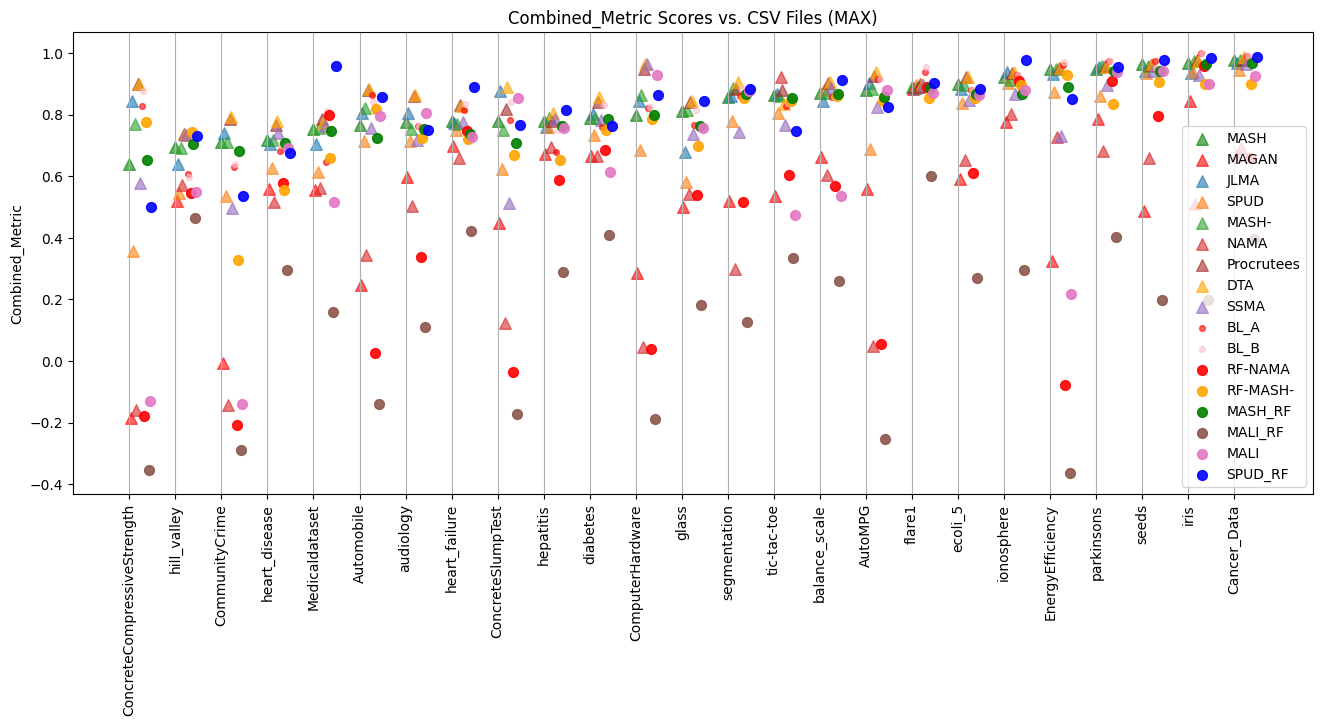

In [9]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

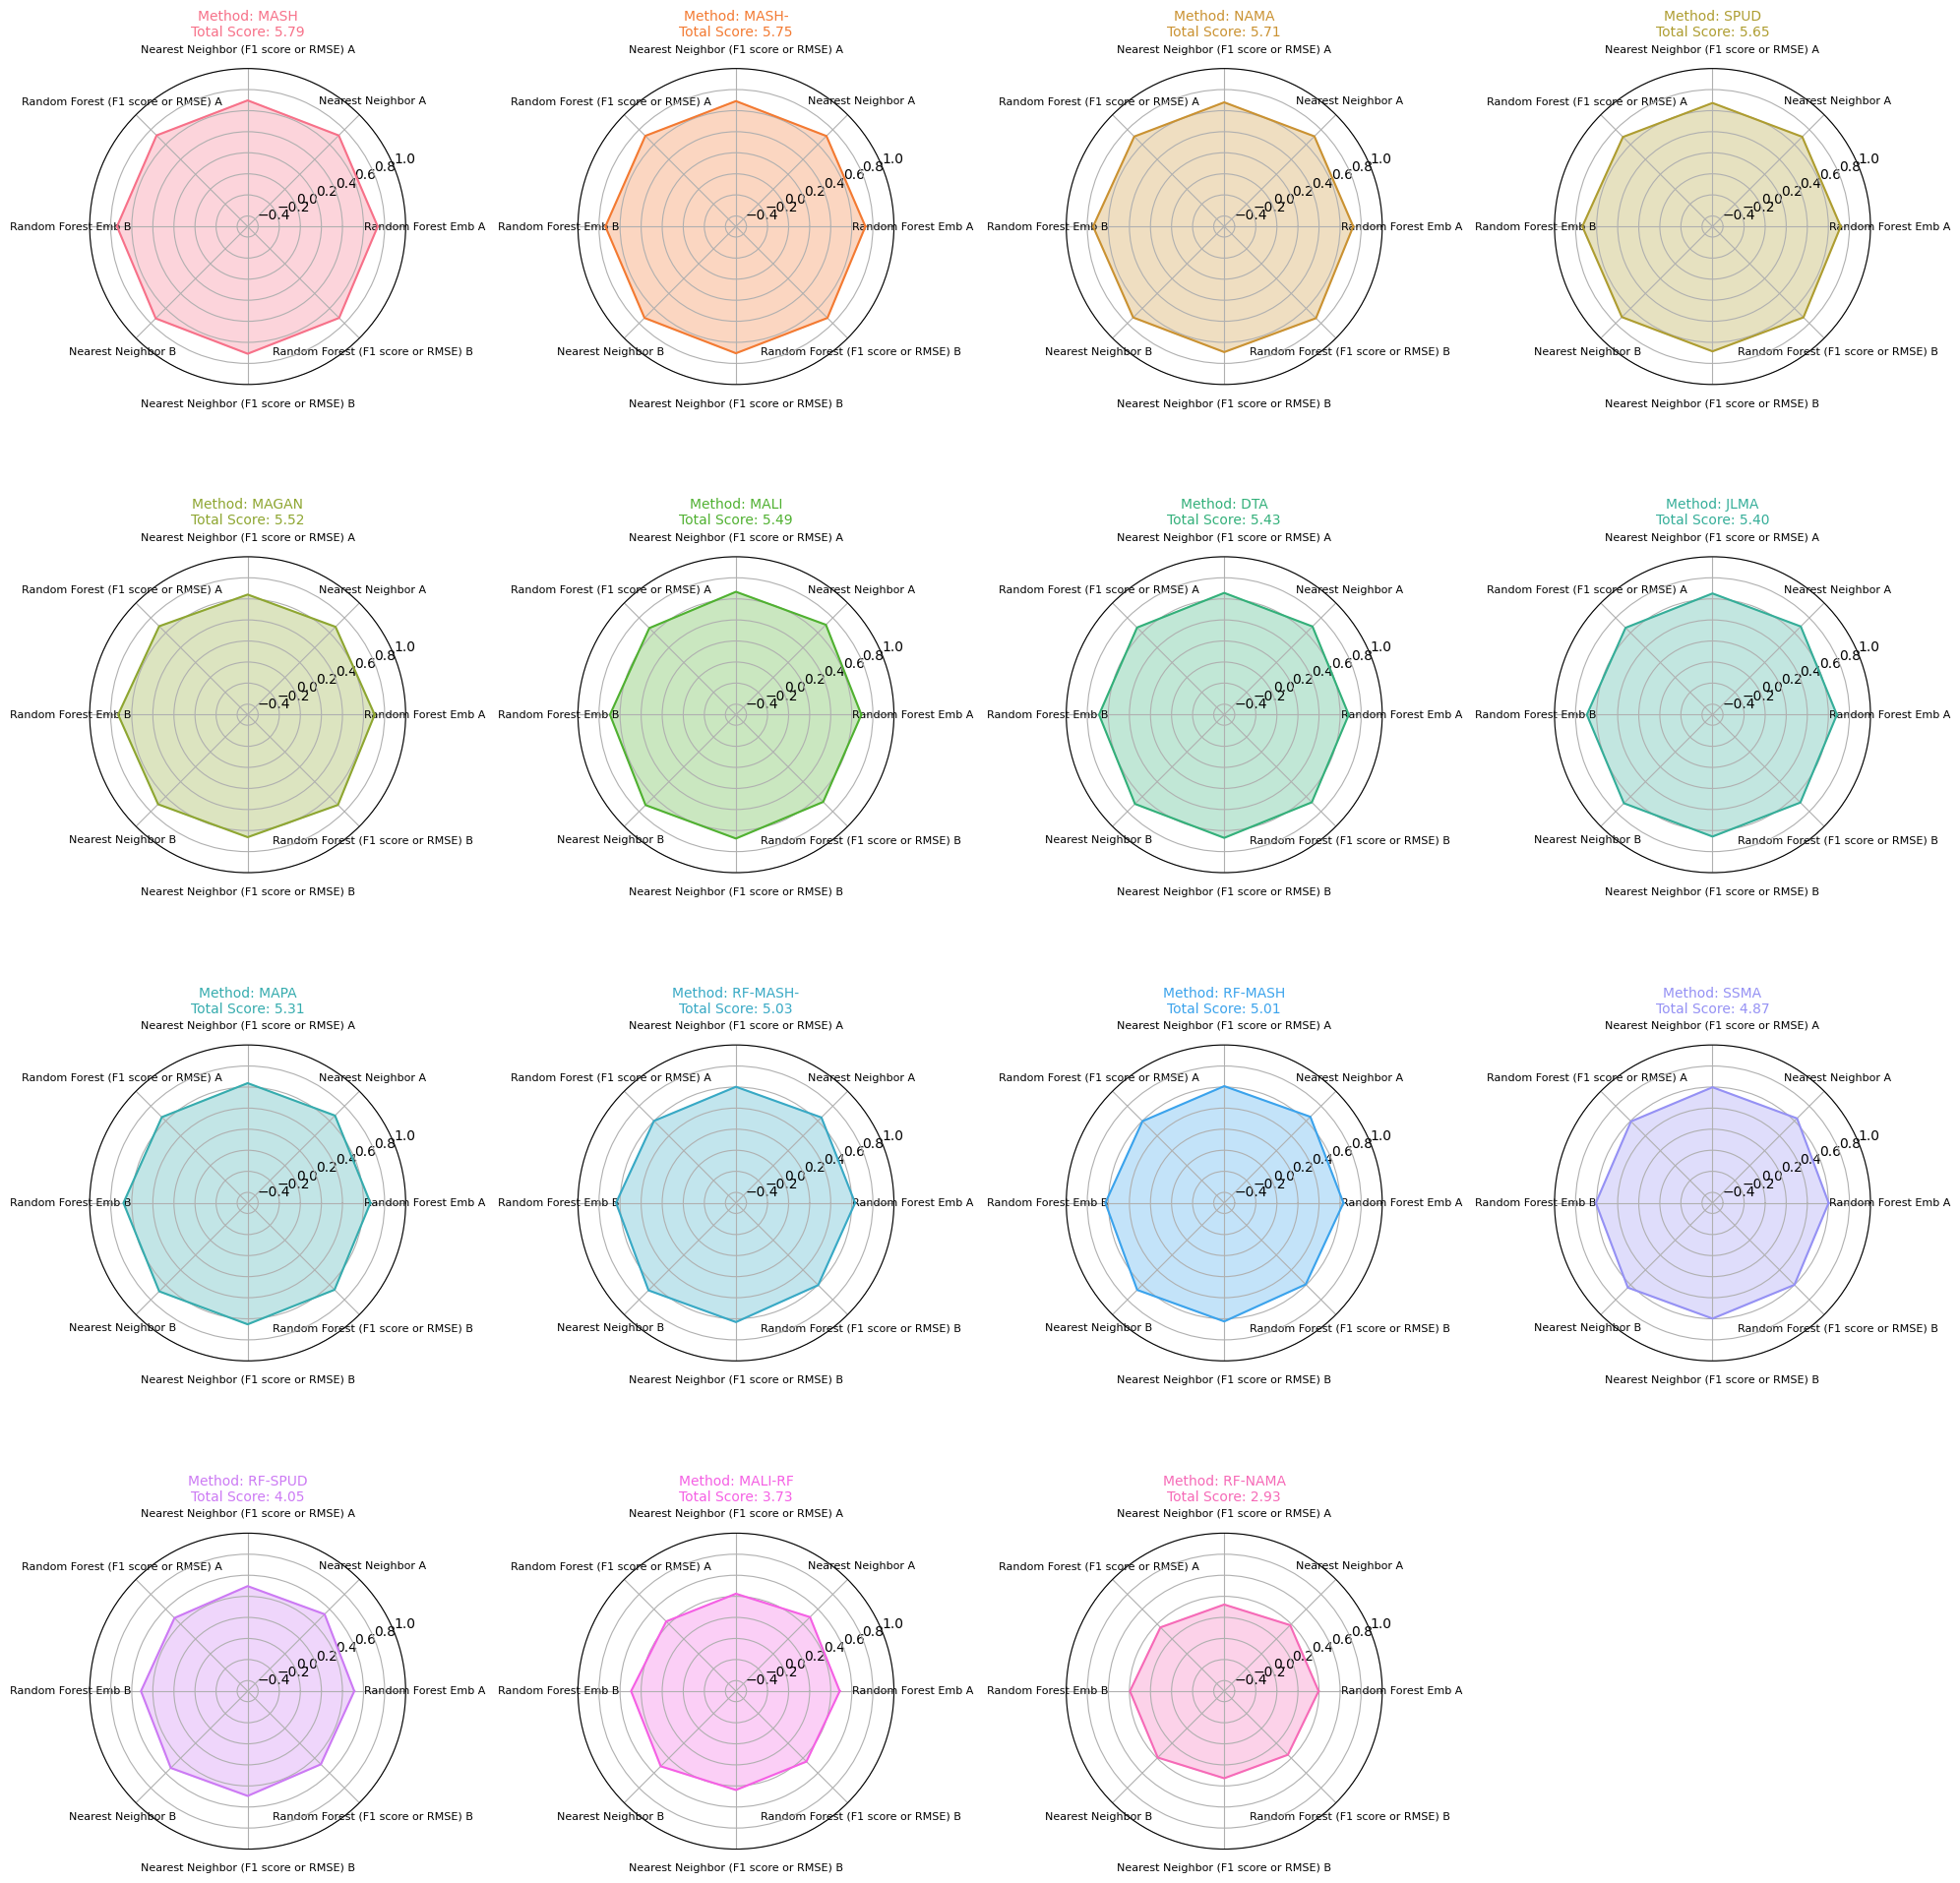

In [10]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

In [11]:
# Rank each column's scores in results_df against each other
ranked_df = results_df.copy().set_index('csv_file').T
for col in ranked_df.columns:
    ranked_df[col] = ranked_df[col].rank(ascending=False)
ranked_df = ranked_df.T.reset_index()

ranked_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,10.0,16.0,2.0,12.0,9.0,7.0,6.0,14.0,15.0,1.0,4.0,8.0,17.0,13.0,11.0,5.0,3.0
1,hill_valley,4.0,16.0,3.0,14.0,7.0,8.0,1.0,12.0,15.0,2.0,9.0,6.0,17.0,13.0,5.0,10.0,11.0
2,CommunityCrime,11.0,13.0,1.0,10.0,5.0,4.0,12.0,15.0,16.0,2.0,3.0,6.0,17.0,14.0,9.0,8.0,7.0
3,heart_disease,3.0,14.0,1.0,12.0,4.5,4.5,15.0,16.0,13.0,2.0,7.0,6.0,17.0,9.0,11.0,10.0,8.0
4,Medicaldataset,6.0,15.0,5.0,13.0,8.0,7.0,11.0,14.0,3.0,4.0,10.0,9.0,17.0,16.0,1.0,12.0,2.0
5,Automobile,11.0,15.0,1.0,13.0,10.0,6.0,7.0,14.0,16.0,2.0,8.0,12.0,17.0,9.0,4.0,3.0,5.0
6,audiology,12.0,14.0,1.0,13.0,5.0,8.0,11.0,15.0,16.0,2.0,3.0,9.0,17.0,4.0,10.0,6.5,6.5
7,heart_failure,7.0,15.0,4.0,10.0,6.0,9.0,14.0,16.0,11.0,3.0,8.0,12.0,17.0,13.0,1.0,5.0,2.0
8,ConcreteSlumpTest,13.0,14.0,1.0,12.0,7.0,9.0,11.0,15.0,16.0,5.0,2.0,10.0,17.0,3.0,8.0,6.0,4.0
9,hepatitis,4.0,14.0,2.0,8.0,5.0,3.0,15.0,12.0,16.0,6.0,9.0,7.0,17.0,10.0,1.0,13.0,11.0


<Axes: >

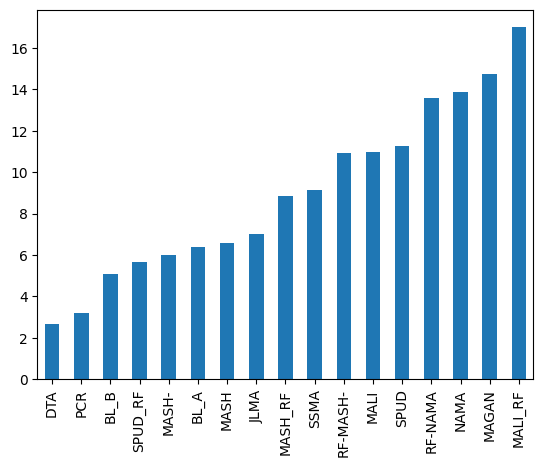

In [12]:
ranked_df.drop(columns= ["csv_file"]).mean().sort_values().plot(kind="bar")

# Helpful data frames


Baseline Scores and their meaning: (Adam doesn't think you should worry too much about these... he can work on these visualizations if they are even wanted)
- A_Classification_Score: Doesn't use an embedding at all. Is simply a KNN set to 4 which uses a train test split of 0.8 to predict on domain A.
- B_Classification_Score: Same thing as A but for B. 

Scores and their meanings
- Random Forest OOB: Is the OOB score from the RF trained against the full embedding (No training or test splits)
- Random Forest Emb A/B: The embedding is calculated with all of the points (No test or train). Then the embedding is split into a train/test. Uses data from both domains to predict points only from domain A or B using a RF algorthim (and is that score).
- Nearest Neighbor A/B: The embedding is calculated with all the points (no test or train). The embedding is then split into a train /test with equal representation from both domains. It uses all of the train data to predict on just one of the test A/B using the KNN algorithm where k = 1/30 of the dataset length. 
- NN (f1 score or RMSE): Depending on data set type, (regression or classification) its either the f1 score or RMSE. These are calculated with the same model as the Nearest Neighbor model from above. 
- RF (F1 score or RMSE): Exact same as the NN one, but using the random Forest model from above.

GRAE Scores and their meanings
- Same structure as the above scores. (The ones labeled as Metric are the F1 or RMSE scores).
- Instead of having the embedding trained on both the test and train data like the above, the embedding is only using the train data
- The Test data is then passed through GRAE networks to make the predictions. 
- This is more "Fair" and less "cheaty" than the above, because the tests points are never seen before the scoring.

In [13]:
proc_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb A', 'Random Forest Emb B',
       'Nearest Neighbor A', 'Nearest Neighbor B',
       'Nearest Neighbor (F1 score or RMSE) A',
       'Nearest Neighbor (F1 score or RMSE) B',
       'Random Forest (F1 score or RMSE) A',
       'Random Forest (F1 score or RMSE) B', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN-metric_A',
       'Grae-KNN-metric_B', 'Grae-KNN_A', 'Grae-KNN_B', 'Grae-RF-OOB',
       'Grae-RF-metric_A', 'Grae-RF-metric_B', 'Grae-RF_A', 'Grae-RF_B'],
      dtype='object')

In [14]:
# All the data
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
228,SSMA,flare1,even,0.3,0.894988,0.356936,0.868657,0.892857,0.857143,0.904762,...,0.876923,0.819420,0.819420,0.876923,0.876923,0.834746,0.837224,0.819420,0.846154,0.876923
7641,NAMA,diabetes,turn,0.3,0.644531,0.000000,0.727199,0.753247,0.748052,0.750649,...,0.759740,0.737585,0.745612,0.746753,0.754545,0.729642,0.720192,0.707537,0.727273,0.712987
12457,MASH,seeds,skewed,0.3,0.864322,0.055807,0.896226,0.875000,0.875000,0.925000,...,0.950000,0.877952,0.924294,0.875000,0.925000,0.905660,0.843446,0.866667,0.850000,0.875000
15388,RF-MASH-,hepatitis,random,0.3,0.652174,0.275284,0.658182,0.585714,0.578571,0.571429,...,0.500000,0.562292,0.531443,0.571429,0.528571,0.689091,0.597516,0.518052,0.592857,0.514286
11100,MALI,parkinsons,random,0.3,0.674872,0.275976,0.787179,0.815385,0.774359,0.830769,...,0.897436,0.802396,0.801358,0.810256,0.794872,0.765385,0.825703,0.830333,0.851282,0.830769


In [15]:
classification_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
667,JLMA,segmentation,skewed,0.3,0.336493,0.345882,0.479167,0.372093,0.372093,0.279070,...,0.790698,0.345377,0.366359,0.348837,0.372093,0.416667,0.340503,0.310562,0.348837,0.325581
3180,JLMA,hill_valley,even,0.3,0.615512,0.005555,0.538223,0.491803,0.483607,0.475410,...,0.450820,0.492389,0.479952,0.508197,0.483607,0.568182,0.505755,0.570089,0.532787,0.573770
14140,JLMA,segmentation,random,0.3,0.208531,0.328045,0.270833,0.246512,0.279070,0.237209,...,0.255814,0.257810,0.211749,0.288372,0.227907,0.276190,0.237574,0.258087,0.260465,0.260465
13152,RF-MASH-,hill_valley,skewed,0.3,0.709571,0.006211,0.696281,0.524590,0.491803,0.483607,...,0.524590,0.407182,0.530171,0.475410,0.549180,0.674587,0.450960,0.475138,0.500000,0.524590
14990,RF-NAMA,balance_scale,turn,0.3,0.506560,0.000003,0.696800,0.208000,0.201600,0.300800,...,0.832000,0.561248,0.754700,0.582400,0.779200,0.686800,0.547503,0.719977,0.579200,0.748800


In [16]:
regression_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
14687,SPUD,AutoMPG,turn,0.3,0.630639,0.000000,0.830723,0.824168,0.833333,0.806728,...,0.851482,0.411897,0.417586,0.797508,0.791854,0.845708,0.346447,0.366360,0.856746,0.839762
15206,MAGAN,ConcreteSlumpTest,distort,0.3,0.447216,0.000000,0.553768,0.558513,0.611833,0.617611,...,0.390801,0.540881,0.542092,0.642916,0.640677,0.487489,0.509262,0.551714,0.684005,0.627669
13492,SPUD,Automobile,random,0.3,-0.074130,0.005823,0.319531,0.317316,0.202662,0.264491,...,0.525014,0.573814,0.725345,0.358357,-0.052227,0.470550,0.599567,0.706346,0.290531,-0.051327
6040,NAMA,Automobile,random,0.3,0.252047,0.002437,0.601008,0.455266,0.646069,0.537001,...,0.351865,0.483843,0.452702,0.528462,0.585907,0.617146,0.464011,0.417163,0.561160,0.644943
14042,MALI-RF,EnergyEfficiency,random,0.3,-0.296743,0.366449,-0.206725,-0.237569,-0.158270,-0.033523,...,-0.169611,1.023583,1.017472,-0.023374,-0.011530,-0.177425,1.137472,1.080100,-0.267161,-0.141711


# Marshall's Visualizations

### Story number one: How close GRAE's Out of Bag Score is to the Model's

(18, 4)


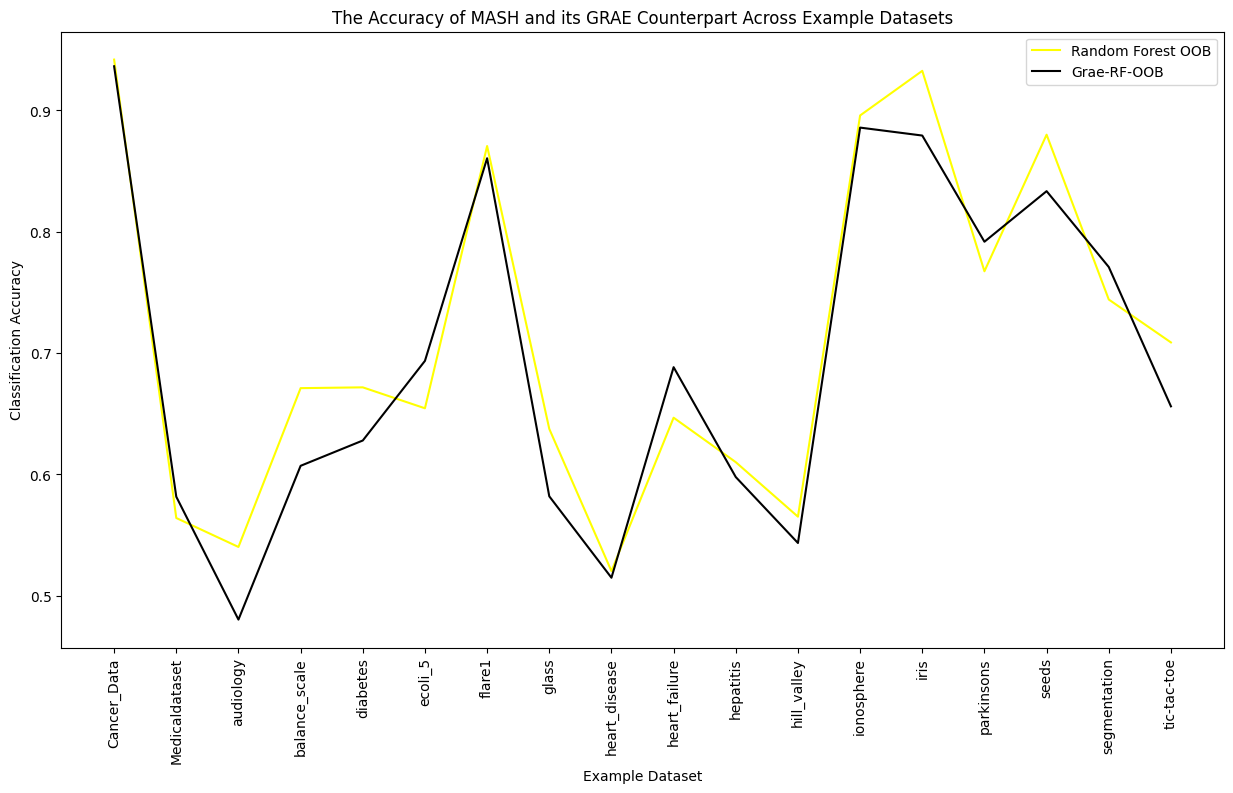

In [17]:
# Collect the average domain scores and the out of bag scores both with and without GRAE
mash_random_scores = subset_df(classification_df, method = "MASH", split = "random")
important_scores = mash_random_scores[["csv_file", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby("csv_file").mean()
print(averaged_scores.shape)

# Plot the A_Classification_Score for each csv_file
plt.figure(figsize=(15, 8))
#plt.plot(averaged_scores.index, averaged_scores["A_Classification_Score"], color='red')
#plt.plot(averaged_scores.index, averaged_scores["B_Classification_Score"], color='blue')
plt.plot(averaged_scores.index, averaged_scores["Random Forest OOB"], color='yellow')
plt.plot(averaged_scores.index, averaged_scores["Grae-RF-OOB"], color='black')
plt.title('The Accuracy of MASH and its GRAE Counterpart Across Example Datasets')
plt.xlabel('Example Dataset')
plt.ylabel('Classification Accuracy')
plt.xticks(rotation=90)
plt.legend(['Random Forest OOB', 'Grae-RF-OOB'])
plt.show()

### Story Number Two: How GRAE's Accuracy Changes Acress Models, Datasets, and Split Types

(75, 4)


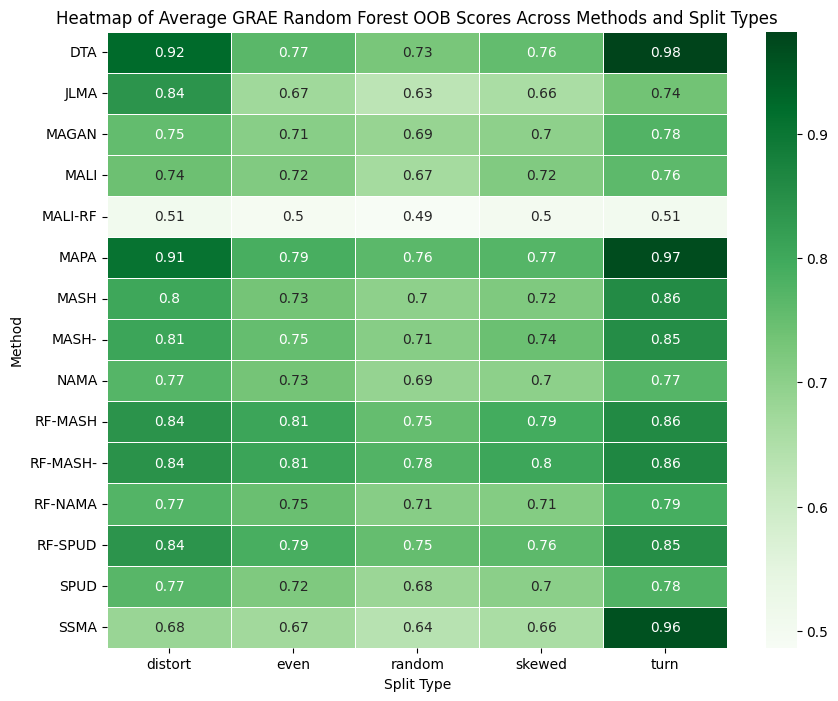

In [18]:
mash_random_scores = subset_df(classification_df)
important_scores = mash_random_scores[["method", "split", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
print(averaged_scores.shape)

# Set the size of the plot
plt.figure(figsize=(10, 8))

data = averaged_scores["Grae-RF-OOB"].unstack()
 
# Create the heatmap
sns.heatmap(data, annot=True, cmap='Greens', linewidths=.5)
plt.title('Heatmap of Average GRAE Random Forest OOB Scores Across Methods and Split Types')
plt.xlabel('Split Type')
plt.ylabel('Method')
plt.show()